<a href="https://colab.research.google.com/github/Kushank2003/deep-learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Normalize pixel values to between 0 and 1
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0
# Convert labels to categories
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(128, activation='relu'),
                     Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7770 - loss: 0.6211 - val_accuracy: 0.8692 - val_loss: 0.3647
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.8874 - loss: 0.3131 - val_accuracy: 0.8859 - val_loss: 0.3152
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9055 - loss: 0.2567 - val_accuracy: 0.8932 - val_loss: 0.3003
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9205 - loss: 0.2166 - val_accuracy: 0.9014 - val_loss: 0.2651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9263 - loss: 0.1958 - val_accuracy: 0.9064 - val_loss: 0.2596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9344 - loss: 0.1742 - val_accuracy: 0.9017 - val_loss: 0.2750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9434 - loss: 0.1521 - val_accuracy: 0.9110 - val_loss: 0.2622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9488 -

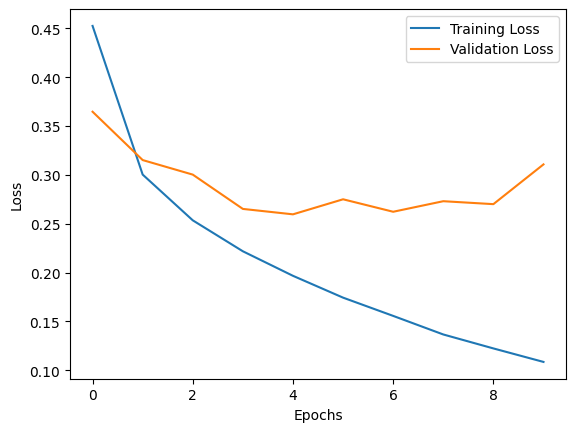

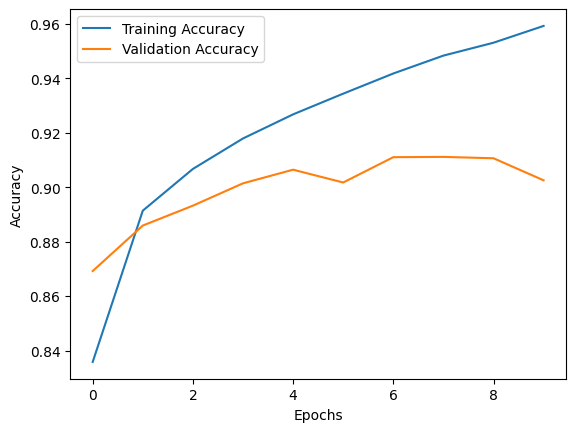

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot accuracy vs. val_accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
class_report = classification_report(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[902   0  29   7   3   1  53   0   4   1]
 [  0 988   0   6   2   0   2   0   2   0]
 [ 17   0 912   8  23   0  40   0   0   0]
 [ 26  12  19 877  31   0  35   0   0   0]
 [  4   0 109  11 796   0  80   0   0   0]
 [  0   0   0   0   0 982   0  14   0   4]
 [163   1  85  14  56   0 680   0   1   0]
 [  0   0   0   0   0   7   0 982   0  11]
 [ 10   0   6   1   6   1   5   3 968   0]
 [  0   0   1   0   0   5   0  55   1 938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.79      0.91      0.84      1000
           3       0.95      0.88      0.91      1000
           4       0.87      0.80      0.83      1000
           5       0.99      0.98      0.98      1000
           6       0.76      0.68      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.97      0